<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML3_1_polynomial_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Парная регрессия

## Импорт библиотек и загрузка данных

Набор данных Ames Housing содержит 79 пояснительных переменных, описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова, с целью прогнозирования цены продажи.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data = pd.read_csv('/content/AmesHousing.csv')  # Замените на фактический путь к файлу
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
print(data.columns)


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Выбор нужных столбцов и их присвоение переменным

Возьмем, переменные GrLivArea (жилая площадь дома в квадратных футах) и SalePrice (цена продажи) для парной регрессии.

In [ ]:
# Выделение столбцов в переменные
X = data['Gr Liv Area']
y = data['SalePrice']


## Построение графика:



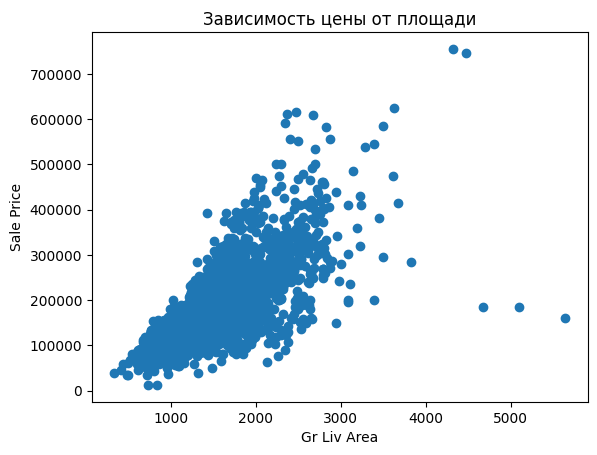

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Зависимость цены от площади')
plt.show()


## Построение линии регрессии

In [ ]:
#Подготовка данных для регрессии
X = pd.DataFrame(X)


In [ ]:
#Импорт и обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


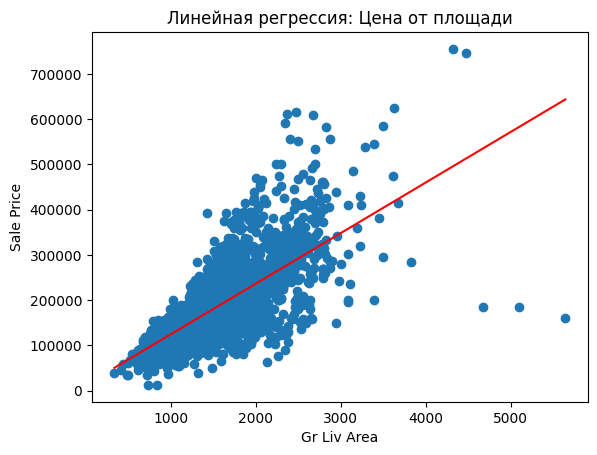

In [ ]:
#Построение линии регрессии
xx = np.arange(X['Gr Liv Area'].min(), X['Gr Liv Area'].max()).reshape(-1, 1)  # Приведение к нужной форме
yy = linear.predict(xx)

plt.scatter(X['Gr Liv Area'], y)
plt.plot(xx, yy, c='r')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Линейная регрессия: Цена от площади')
plt.show()


In [ ]:
linear.score(X, y)

0.49953785669572837

50% - достаточно низкий результат коэффициента детерминации

## Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Создание объекта для полиномиальных признаков второго порядка

transformation = PolynomialFeatures(degree=2)

In [ ]:
# Обучение объекта трансформации

transformation.fit(X)

PolynomialFeatures()

In [ ]:
# Преобразование данных

X_2 = transformation.transform(X)

In [ ]:
# Проверка нового датасета

print(X_2.shape)  # Проверка размерности
print(X_2[:5])    # Первые 5 строк

(2930, 3)
[[1.000000e+00 1.656000e+03 2.742336e+06]
 [1.000000e+00 8.960000e+02 8.028160e+05]
 [1.000000e+00 1.329000e+03 1.766241e+06]
 [1.000000e+00 2.110000e+03 4.452100e+06]
 [1.000000e+00 1.629000e+03 2.653641e+06]]


2930 — это количество строк в датасете.
3 — это количество признаков (столбцов) в новом датасете. В данном случае:
* Первый столбец — это столбец единиц (так называемый bias), который добавляется автоматически для интерсепта в модели.
* Второй столбец — это ] исходный признак Gr Liv Area, который представляет собой площадь жилой площади.
* Третий столбец — это квадрат признака, то есть Gr Liv Area^2, который будет использоваться для моделирования нелинейной зависимости.

In [ ]:
# Обучение модели полиномиальной регрессии:

poly_linear = LinearRegression().fit(X_2, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


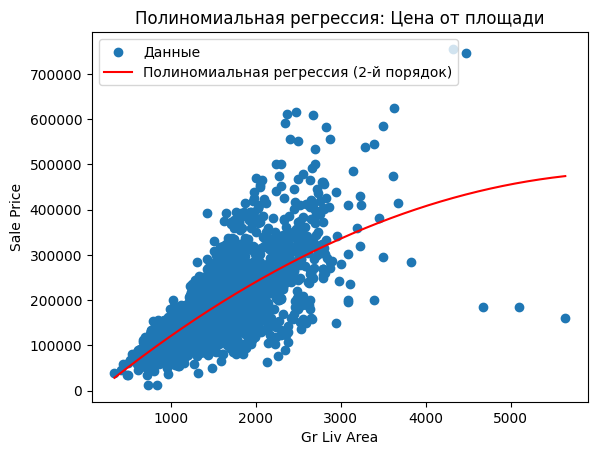

In [ ]:
xx = np.arange(X['Gr Liv Area'].min(), X['Gr Liv Area'].max(), 1).reshape(-1, 1)  # Приведение к нужной форме
xx_2 = transformation.transform(xx)  # Преобразование новых данных в полиномиальные признаки
yy_poly = poly_linear.predict(xx_2)

# Построение графика
plt.scatter(X['Gr Liv Area'], y, label='Данные')
plt.plot(xx, yy_poly, c='r', label='Полиномиальная регрессия (2-й порядок)')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Полиномиальная регрессия: Цена от площади')
plt.legend()
plt.show()

In [ ]:
# Оценка коэффициента детерминации для полиномиальной регрессии

r2_poly = poly_linear.score(X_2, y)
print(f"Коэффициент детерминации для полиномиальной регрессии: {r2_poly:.2f}")

Коэффициент детерминации для полиномиальной регрессии: 0.51


Коэффициент детерминации чуть улучшился по сравнентию с прошлым результатом

# Классификация


## Загурзка и предварительный анализ

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("AmesHousing.csv")

In [ ]:
# Создание целевой переменной
median_price = data['SalePrice'].median()
data['y'] = (data['SalePrice'] > median_price).astype(int)

# Выделение признаков
X = data[['Gr Liv Area', 'Overall Qual']]
y = data['y']


## Визуализация

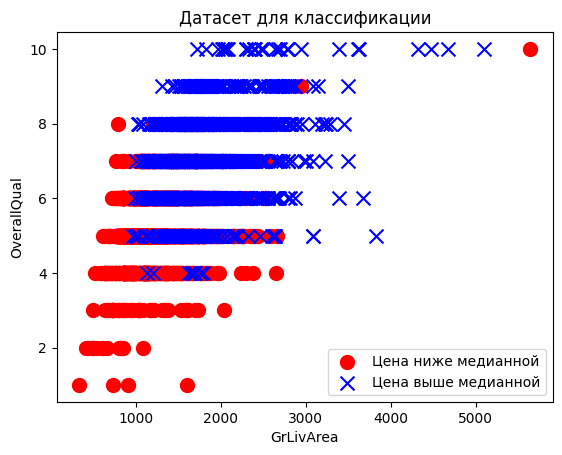

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100, label='Цена ниже медианной')
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100, label='Цена выше медианной')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
plt.title('Датасет для классификации')
plt.legend()
plt.show()


## Создание и обучение модели логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

# Создание и обучение модели
logistic = LogisticRegression()
logistic.fit(X, y)


LogisticRegression()

## Визуализация границы принятия решения и оценка точности

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


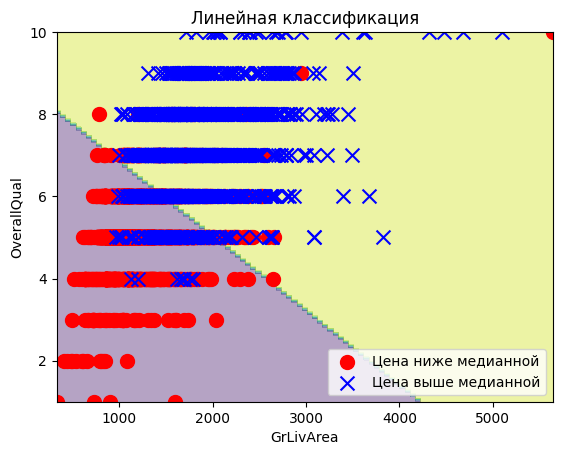

In [ ]:
# Построение сетки для контурного графика с меньшим разрешением (иначе проблема с ОЗУ)
xx, yy = np.meshgrid(
    np.arange(X.iloc[:, 0].min(), X.iloc[:, 0].max() + 0.1, 0.1),
    np.arange(X.iloc[:, 1].min(), X.iloc[:, 1].max() + 0.1, 0.1))

# Предсказание классов на сетке
Z = logistic.predict(np.array(list(zip(xx.ravel(), yy.ravel())))).reshape(xx.shape)

# Визуализация границы принятия решения

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], marker="o", c='r', s=100, label='Цена ниже медианной')
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], marker="x", c='b', s=100, label='Цена выше медианной')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
plt.title('Линейная классификация')
plt.legend()
plt.show()

In [ ]:
# Оценка точности модели
accuracy = logistic.score(X, y)
print(f"Точность линейной модели: {accuracy:.2f}")


Точность линейной модели: 0.86


Удовлетворительная точность, но странный график

## Создание полиномиальных признаков и обучение новой модели

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков (степень 3)
poly_transform = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_transform.fit_transform(X)

# Обучение модели логистической регрессии на полиномиальных признаках
class_3 = LogisticRegression()
class_3.fit(X_poly, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Визуализация границы принятия решения и оценка точности новой модели

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


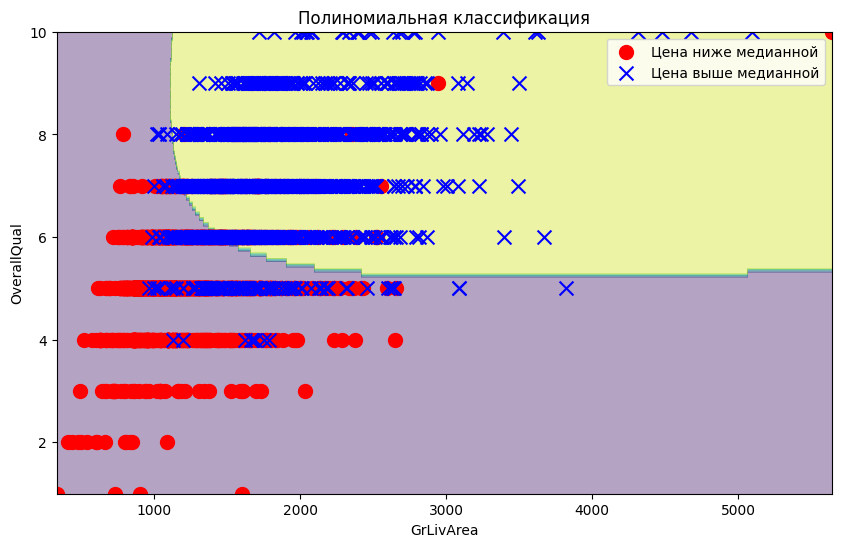

In [ ]:
# Предсказание классов на сетке для полиномиальной модели
Z_poly = class_3.predict(poly_transform.transform(np.array(list(zip(xx.ravel(), yy.ravel()))))).reshape(xx.shape)

# Визуализация полиномиальной границы
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_poly, alpha=0.4)
plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], marker="o", c='r', s=100, label='Цена ниже медианной')
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], marker="x", c='b', s=100, label='Цена выше медианной')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
plt.title('Полиномиальная классификация')
plt.legend()
plt.show()

In [ ]:
# Оценка точности полиномиальной модели
accuracy_poly = class_3.score(X_poly, y)
print(f"Точность полиномиальной модели: {accuracy_poly:.2f}")


Точность полиномиальной модели: 0.87


График стал более подходящим, введение полиномиальных признаков также существенно повышает качество модели бинарной классификации.

# Регрессия на реальных данных

## Загрузка и определение целевых атрибутов

In [ ]:
import pandas as pd

# Загрузка данных
data_cleaned = pd.read_csv("AmesHousing.csv")


In [ ]:
data_encoded = pd.get_dummies(data_cleaned)

In [ ]:
data_encoded = data_encoded.fillna(data_encoded.median())

In [ ]:
# Разделение на признаки и целевую переменную
y_kc_prices = data_encoded['SalePrice']
X_kc_prices = data_encoded.drop("SalePrice", axis=1)

# Печать формы получившихся массивов
X_kc_prices.shape, y_kc_prices.shape


((2930, 305), (2930,))

## Обучение модели линейной регрессии и оценка её точности

In [ ]:
from sklearn.linear_model import LinearRegression

# Создание и обучение линейной регрессионной модели
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# Оценка точности модели
accuracy_linear = reg_kc_multiple.score(X_kc_prices, y_kc_prices)
print(f"Точность линейной модели: {accuracy_linear:.2f}")


Точность линейной модели: 0.94


Достаточно высокая точность

## Визуализация отклонений линейной модели

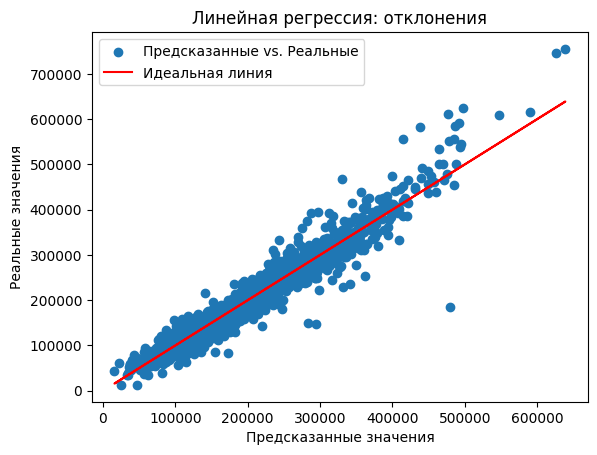

In [ ]:
import matplotlib.pyplot as plt

# Предсказания модели
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)

# Визуализация отклонений
plt.scatter(y_pred_kc_prices, y_kc_prices, label='Предсказанные vs. Реальные')
plt.plot(y_pred_kc_prices, y_pred_kc_prices, color='red', label='Идеальная линия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Линейная регрессия: отклонения')
plt.legend()
plt.show()


## Полиномиальные признаки второго порядка

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
X_3_kc_prices = poly_transform.fit_transform(X_kc_prices)

# Обучение полиномиальной модели линейной регрессии
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

# Оценка точности полиномиальной модели
accuracy_poly = reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)
print(f"Точность полиномиальной модели: {accuracy_poly:.2f}")


Точность полиномиальной модели: 0.98


Высокая точность

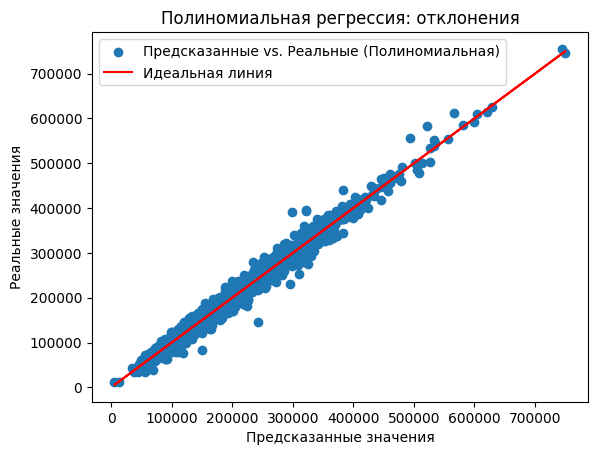

In [ ]:
# Предсказания полиномиальной модели
y_pred_poly_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)

# Визуализация отклонений полиномиальной модели
plt.scatter(y_pred_poly_kc_prices, y_kc_prices, label='Предсказанные vs. Реальные (Полиномиальная)')
plt.plot(y_pred_poly_kc_prices, y_pred_poly_kc_prices, color='red', label='Идеальная линия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Полиномиальная регрессия: отклонения')
plt.legend()
plt.show()


# Задания для самостоятельного выполнения

## 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [ ]:
import time


In [ ]:
# Линейная модель для парной регрессии: замер времени
start_time = time.time()
linear = LinearRegression().fit(X, y)
linear_training_time = time.time() - start_time
print(f"Время обучения линейной модели (парная регрессия): {linear_training_time:.4f} секунд")

Время обучения линейной модели (парная регрессия): 0.0066 секунд


In [ ]:
start_time = time.time()
poly_model = LinearRegression().fit(X_poly, y)
poly_training_time = time.time() - start_time
print(f"Время обучения полиномиальной модели (парная регрессия): {poly_training_time:.4f} секунд")

Время обучения полиномиальной модели (парная регрессия): 0.0085 секунд


In [ ]:
# Линейная модель для классификации: замер времени
start_time = time.time()
logistic = LogisticRegression().fit(X, y)
logistic_training_time = time.time() - start_time
print(f"Время обучения линейной модели (классификация): {logistic_training_time:.4f} секунд")

Время обучения линейной модели (классификация): 0.0201 секунд


In [ ]:
start_time = time.time()
logistic_poly = LogisticRegression(max_iter=1000).fit(X_poly, y)
logistic_poly_training_time = time.time() - start_time
print(f"Время обучения полиномиальной модели (классификация): {logistic_poly_training_time:.4f} секунд")

Время обучения полиномиальной модели (классификация): 0.3259 секунд


In [ ]:
# Линейная модель: замер времени
start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
linear_training_time = time.time() - start_time
print(f"Время обучения линейной модели: {linear_training_time:.4f} секунд")

Время обучения линейной модели: 0.1552 секунд


In [ ]:
start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
poly_training_time = time.time() - start_time
print(f"Время обучения полиномиальной модели: {poly_training_time:.4f} секунд")

Время обучения полиномиальной модели: 78.6063 секунд


## 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

Полином 5-го порядка: время обучения = 0.0013 секунд, точность R² = 0.9217
Полином 10-го порядка: время обучения = 0.0014 секунд, точность R² = 0.9232
Полином 100-го порядка: время обучения = 0.0036 секунд, точность R² = 0.7925


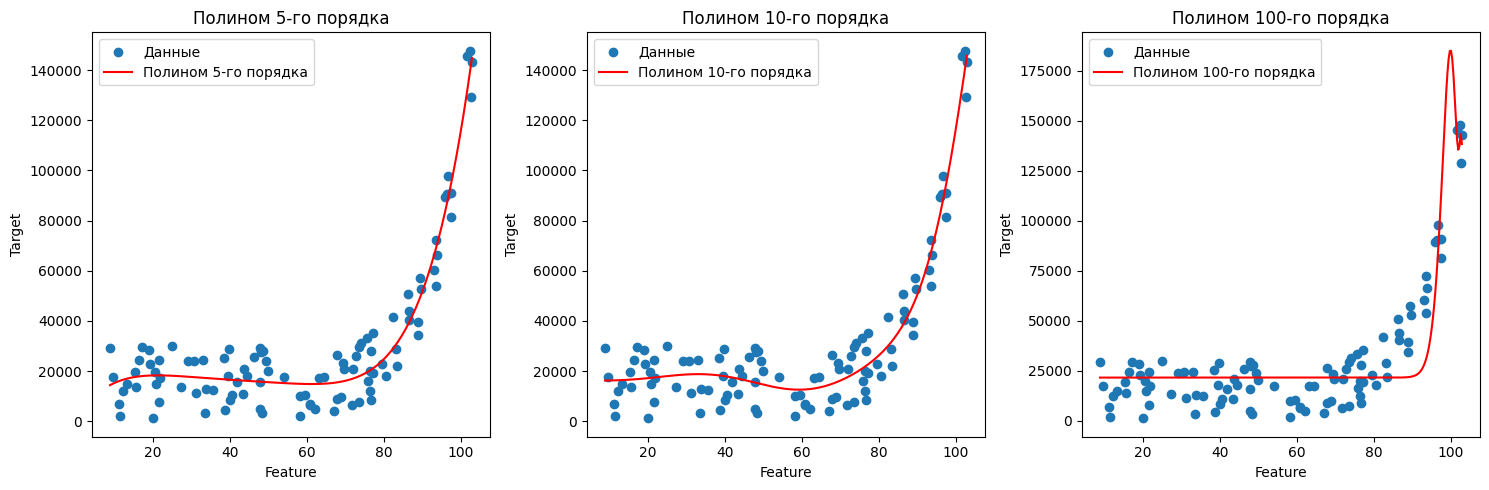

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

# Шаг 1: Загрузка данных
data_gen_reg = pd.read_csv("gen_regression.csv")
X = data_gen_reg[["x"]]
y = data_gen_reg["y"]

# Функция для построения полиномиальной модели и замера времени обучения
def build_poly_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    print(f"Полином {degree}-го порядка: время обучения = {training_time:.4f} секунд, точность R² = {r2:.4f}")
    return model, X_poly, y_pred

# Шаг 2: Построение моделей 5-го, 10-го и 100-го порядков и замер времени и точности
degrees = [5, 10, 100]
models = {}

for degree in degrees:
    models[degree] = build_poly_model(degree, X, y)

# Шаг 3: Визуализация результатов для каждой модели
xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees, 1):
    plt.subplot(1, 3, i)
    plt.scatter(X, y, label="Данные")
    yy_pred = models[degree][0].predict(PolynomialFeatures(degree=degree).fit_transform(xx))
    plt.plot(xx, yy_pred, label=f"Полином {degree}-го порядка", color="red")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"Полином {degree}-го порядка")
    plt.legend()

plt.tight_layout()
plt.show()


## 3. То же самое проделайте с датасетом для классификации и "King county".

Полином 2-го порядка: время обучения = 0.0041 секунд, точность R² = 0.5327
Полином 3-го порядка: время обучения = 0.0088 секунд, точность R² = 0.5390
Полином 5-го порядка: время обучения = 0.0217 секунд, точность R² = 0.5436


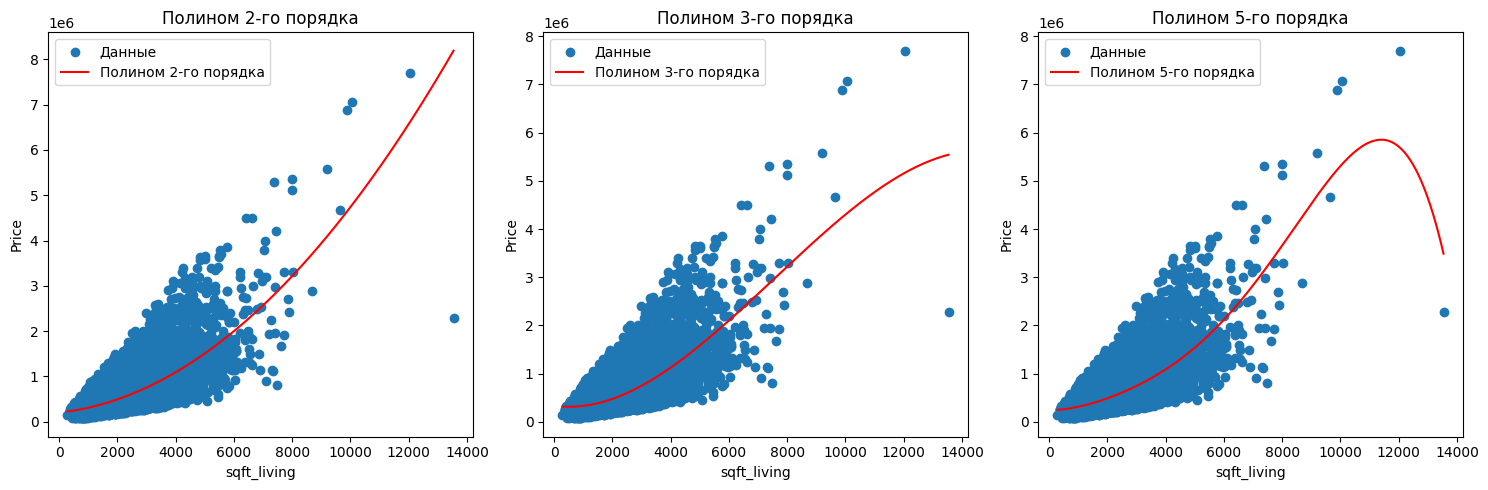

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

# Шаг 1: Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")
data_kc = data_kc.dropna(subset=["price"])  # Удаляем строки без цены

# Удаляем бесконечные значения и NaN
data_kc = data_kc[np.isfinite(data_kc["price"])]
data_kc = data_kc[np.isfinite(data_kc["sqft_living"])]

# Для примера используем только sqft_living как предиктор
X_kc = data_kc[["sqft_living"]]
y_kc = data_kc["price"]

# Функция для построения полиномиальной модели и замера времени обучения
def build_poly_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    print(f"Полином {degree}-го порядка: время обучения = {training_time:.4f} секунд, точность R² = {r2:.4f}")
    return model, X_poly, y_pred

# Шаг 2: Построение моделей 2-го, 3-го и 5-го порядков
degrees_kc = [2, 3, 5]
models_kc = {}

for degree in degrees_kc:
    models_kc[degree] = build_poly_model(degree, X_kc, y_kc)

# Шаг 3: Визуализация результатов для каждой модели
xx_kc = np.linspace(X_kc.min(), X_kc.max(), 300).reshape(-1, 1)

plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees_kc, 1):
    plt.subplot(1, 3, i)
    plt.scatter(X_kc, y_kc, label="Данные")
    yy_pred_kc = models_kc[degree][0].predict(PolynomialFeatures(degree=degree).fit_transform(xx_kc))
    plt.plot(xx_kc, yy_pred_kc, label=f"Полином {degree}-го порядка", color="red")
    plt.xlabel("sqft_living")
    plt.ylabel("Price")
    plt.title(f"Полином {degree}-го порядка")
    plt.legend()

plt.tight_layout()
plt.show()


## 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

Таблица эффективности моделей для задачи регрессии:
   Degree  Training Time (s)        R²
0       1           0.001327  0.374674
1       2           0.001242  0.735975
2       3           0.001235  0.897448
3       5           0.001348  0.921748
4      10           0.001231  0.923200

Таблица эффективности моделей для King County:
   Degree  Training Time (s)        R²
0       1           0.003029  0.492853
1       2           0.011425  0.532743
2       3           0.008810  0.539005
3       5           0.013659  0.543598


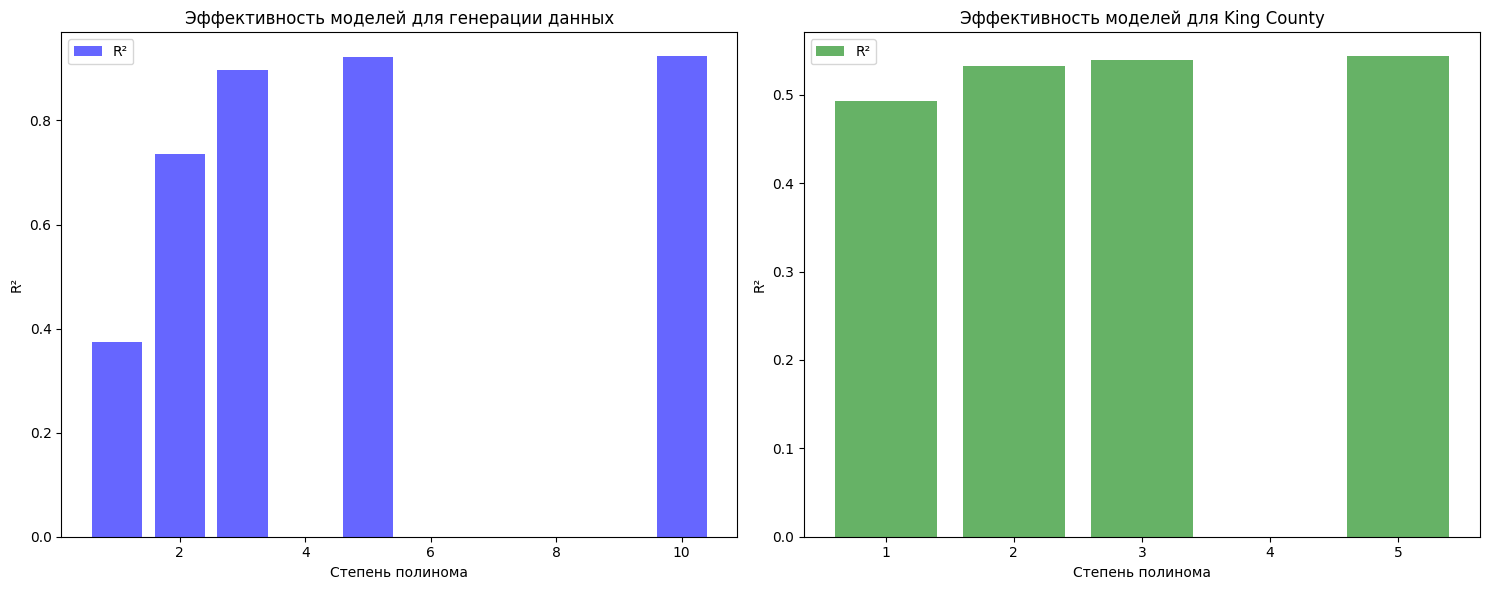

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

# Функция для построения полиномиальной модели и замера времени обучения
def build_poly_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    return training_time, r2

# Загрузка данных для регрессии
data_gen_reg = pd.read_csv("gen_regression.csv")
X = data_gen_reg[["x"]]
y = data_gen_reg["y"]

# Построение моделей для генерации данных
degrees_reg = [1, 2, 3, 5, 10]
results_reg = []

for degree in degrees_reg:
    training_time, r2 = build_poly_model(degree, X, y)
    results_reg.append({"Degree": degree, "Training Time (s)": training_time, "R²": r2})

# Создание DataFrame для таблицы результатов
results_df_reg = pd.DataFrame(results_reg)

# Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")
data_kc = data_kc.dropna(subset=["price"])
data_kc = data_kc[np.isfinite(data_kc["price"]) & np.isfinite(data_kc["sqft_living"])]

X_kc = data_kc[["sqft_living"]]
y_kc = data_kc["price"]

# Построение моделей для King County
degrees_kc = [1, 2, 3, 5]
results_kc = []

for degree in degrees_kc:
    training_time, r2 = build_poly_model(degree, X_kc, y_kc)
    results_kc.append({"Degree": degree, "Training Time (s)": training_time, "R²": r2})

# Создание DataFrame для таблицы результатов King County
results_df_kc = pd.DataFrame(results_kc)

# Вывод таблиц результатов
print("Таблица эффективности моделей для задачи регрессии:")
print(results_df_reg)

print("\nТаблица эффективности моделей для King County:")
print(results_df_kc)

# Визуализация результатов
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(results_df_reg["Degree"], results_df_reg["R²"], color='blue', alpha=0.6, label='R²')
plt.ylabel("R²")
plt.xlabel("Степень полинома")
plt.title("Эффективность моделей для генерации данных")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(results_df_kc["Degree"], results_df_kc["R²"], color='green', alpha=0.6, label='R²')
plt.ylabel("R²")
plt.xlabel("Степень полинома")
plt.title("Эффективность моделей для King County")
plt.legend()

plt.tight_layout()
plt.show()


## 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")

# Удаление строк с отсутствующими значениями в целевой переменной
data_kc = data_kc.dropna(subset=["price"])

# Определение матрицы признаков и целевой переменной
X_kc = data_kc.drop(columns=["id", "date", "price"])  # Удаляем ненужные столбцы
y_kc = data_kc["price"]

# Создание и обучение модели линейной регрессии
model_kc = LinearRegression().fit(X_kc, y_kc)

# Получение коэффициентов и названий признаков
coefficients = model_kc.coef_
feature_names = X_kc.columns

# Создание DataFrame для представления коэффициентов
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортировка по абсолютным значениям коэффициентов для оценки важности
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Вывод коэффициентов
print("Коэффициенты линейной модели для задачи о продаже домов:")
print(coef_df[['Feature', 'Coefficient']])

# Вывод наиболее важных признаков
print("\nНаиболее важные признаки:")
print(coef_df.head())


Коэффициенты линейной модели для задачи о продаже домов:
          Feature    Coefficient
14            lat  602748.226449
5      waterfront  582960.458423
15           long -214729.828253
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
0        bedrooms  -35766.541444
7       condition   26385.649139
4          floors    6689.550115
11       yr_built   -2620.223211
13        zipcode    -582.419866
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
17     sqft_lot15      -0.382642
3        sqft_lot       0.128598

Наиболее важные признаки:
       Feature    Coefficient  Absolute Coefficient
14         lat  602748.226449         602748.226449
5   waterfront  582960.458423         582960.458423
15        long -214729.828253         214729.828253
8        grade   95890.445151          95890.445151
6         view   52870.942384

Значение признаков lat и waterfront показывает, что местоположение является решающим фактором при оценке стоимости жилья. Рынок недвижимости в King County может быть сильно связан с привлекательностью локации.

## 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")

# Удаление строк с отсутствующими значениями в целевой переменной
data_kc = data_kc.dropna(subset=["price"])

# Определение матрицы признаков и целевой переменной
X_kc = data_kc.drop(columns=["id", "date", "price"])  # Удаляем ненужные столбцы
y_kc = data_kc["price"]

# Создание полиномиальных признаков
poly_features = PolynomialFeatures(degree=3)  # Выбор степени полинома
X_poly = poly_features.fit_transform(X_kc)

# Создание и обучение модели линейной регрессии на полиномиальных признаках
model_poly = LinearRegression().fit(X_poly, y_kc)

# Получение коэффициентов и названий признаков
coefficients_poly = model_poly.coef_
feature_names_poly = poly_features.get_feature_names_out(X_kc.columns)

# Создание DataFrame для представления коэффициентов
coef_poly_df = pd.DataFrame({'Feature': feature_names_poly, 'Coefficient': coefficients_poly})

# Сортировка по абсолютным значениям коэффициентов для оценки важности
coef_poly_df['Absolute Coefficient'] = coef_poly_df['Coefficient'].abs()
coef_poly_df = coef_poly_df.sort_values(by='Absolute Coefficient', ascending=False)

# Вывод коэффициентов
print("Коэффициенты полиномиальной модели для задачи о продаже домов:")
print(coef_poly_df[['Feature', 'Coefficient']])

# Вывод наиболее важных признаков
print("\nНаиболее важные признаки:")
print(coef_poly_df.head())


Коэффициенты полиномиальной модели для задачи о продаже домов:
                      Feature   Coefficient
640         sqft_living lat^2 -8.713357e+02
1200         sqft_above lat^2 -8.102816e+02
1312      lat^2 sqft_living15 -5.895869e+02
641      sqft_living lat long -5.372046e+02
1201      sqft_above lat long -5.158319e+02
...                       ...           ...
659   sqft_lot^2 yr_renovated  3.183445e-10
769     sqft_lot sqft_lot15^2  7.022383e-12
1329             sqft_lot15^3 -4.784395e-12
664     sqft_lot^2 sqft_lot15  3.182121e-12
650                sqft_lot^3 -2.061351e-12

[1330 rows x 2 columns]

Наиболее важные признаки:
                   Feature  Coefficient  Absolute Coefficient
640      sqft_living lat^2  -871.335655            871.335655
1200      sqft_above lat^2  -810.281642            810.281642
1312   lat^2 sqft_living15  -589.586896            589.586896
641   sqft_living lat long  -537.204628            537.204628
1201   sqft_above lat long  -515.831926        

# Контрольные вопросы по множественной регрессии и полиномиальным признакам

## 1. В чем заключается суть метода множественной регрессии?

Метод множественной регрессии используется для моделирования зависимости одной целевой переменной от нескольких независимых переменных. Он позволяет исследовать, как изменения в независимых переменных влияют на зависимую переменную. Множественная регрессия предполагает, что существует линейная связь между переменными, и использует статистические методы для оценки коэффициентов, которые показывают вес каждой независимой переменной в предсказании целевой переменной.

## 2. Какие основные недостатки применения полиномиальных признаков на практике?

- **Переобучение**. Полиномиальные признаки могут привести к созданию сложных моделей, которые хорошо работают на обучающем наборе данных, но плохо обобщаются на новых данных.
- **Увеличение размерности**. Количество полиномиальных признаков растет экспоненциально с увеличением степени полинома и числа атрибутов, что может затруднить вычисления и увеличить время обучения модели.
- **Непредсказуемость**. Высокие степени полиномов могут создавать резкие колебания и делать модель менее интерпретируемой.

## 3. В каких случаях введение полиномиальных признаков может быть полезным?

- **Нелинейные зависимости**. Если данные имеют явные нелинейные зависимости, полиномиальные признаки могут помочь лучше аппроксимировать эти отношения.
- **Улучшение качества модели**. Введение полиномиальных признаков может повысить точность предсказаний, особенно если линейная модель не справляется с задачей.
- **Исследовательская работа**. В ходе анализа данных полиномиальные признаки могут быть использованы для изучения сложных взаимодействий между переменными.

## 4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?

Требования к объему оперативной памяти растут, поскольку количество полиномиальных признаков увеличивается с ростом числа исходных признаков и степени полинома. Это может привести к значительным затратам памяти, особенно в больших наборах данных, так как каждая комбинация признаков и их степеней требует хранения в памяти.

## 5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?

Добавление всех комбинаций атрибутов до заданной степени позволяет модели захватить все возможные взаимодействия между переменными. Это обеспечивает более полное представление о зависимости целевой переменной от входных данных и помогает улучшить качество предсказаний. Исключение некоторых комбинаций может привести к потере важной информации и ухудшению модели.

## 6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?

На графике может наблюдаться прямая линия из-за того, что результирующая модель, несмотря на наличие полиномиальных признаков, в определенных диапазонах значений атрибутов может отображать линейную зависимость. Это также может быть связано с тем, что при оценке модели использовалась высокая степень полинома, но в определенных участках данные все еще имеют линейное распределение. Визуализация может сглаживать данные, и сложные зависимости могут не проявляться явно.



# Дополнительные задания

## 1. Разделите датасет о продаже домов на обучающую и тестовую выборки. Постройте таблицу сравнения тестовой эффективности модели при разных степенях полиномов.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import time

# Шаг 1: Загрузка данных
data_kc_prices = pd.read_csv("kc_house_data.csv")
X_kc = data_kc_prices.drop(["id", "date", "price"], axis=1)
y_kc = data_kc_prices["price"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_kc, y_kc, test_size=0.2, random_state=42)

# Снижение степени полинома до 1-4 для уменьшения времени выполнения
degrees_kc = [1, 2, 3, 4]  # Используем только до 4 степени
results_kc = []

def build_poly_model(degree, X_train, y_train, X_test, y_test):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_train_poly, y_train)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    return degree, training_time, r2

# Построение моделей и получение результатов
for degree in degrees_kc:
    results_kc.append(build_poly_model(degree, X_train, y_train, X_test, y_test))

# Создание таблицы сравнения
results_df_kc = pd.DataFrame(results_kc, columns=['Degree', 'Training Time (s)', 'R² Score'])
print(results_df_kc)


   Degree  Training Time (s)     R² Score
0       1           0.008852     0.701190
1       2           0.264879     0.798381
2       3           9.713527    -2.107842
3       4         290.493106 -2859.584047


## 2. На датасете для классификации постройте конвейер, включающий добавление полиномиальных признаков и обучение модели. Подберите оптимальную степень полинома поиском по сетке.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Загрузка данных
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = wine.target

# Создание конвейера
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression(solver='liblinear', max_iter=10000, tol=1e-3))  # Увеличьте max_iter и установите tol
])

# Настройка сетки параметров
param_grid = {
    'poly__degree': [1, 2, 3]  # Используйте степени 1, 2 и 3
}

# Поиск по сетке
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_wine, y_wine)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.4f}")


Лучшие параметры: {'poly__degree': 1}
Лучшая точность: 0.9889


## 3. Загрузите датасет по классификации изображений (digits в sklearn). Попробуйте построить на нем полиномиальные признаки. Сделайте вывод о применимости полиномиальных моделей.

In [ ]:
from sklearn.datasets import load_digits

# Загрузка данных
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_digits_poly = poly.fit_transform(X_digits)

print(f"Исходные данные: {X_digits.shape}")
print(f"Полиномиальные признаки: {X_digits_poly.shape}")


Исходные данные: (1797, 64)
Полиномиальные признаки: (1797, 2145)
